# MineCraft Project - Kristen Chan

# Introduction

### Background
This project focuses on the video game Minecraft by examining different characteristics and behaviours that can affect whether or not a player will subscribe to a game-related newsletter. 

### Dataset Description
* Number of Observations: 196
* Number of Variables: 7
* Data Source: The Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood
* Summary of the Dataset: This data is used to determine user engagement across Minecraft by collecting personal information of each individual player to perform further analysis.  

| Column Name |Data Type | Description|Possible Value/Range| 
|-----------|-------|-------------|-------------|
|  experience| character (chr)  |Player’s level of experience with the game |Beginner, Veteran, Regular,Amateur,Pro |
| subscribe |Logical value (lgl) | Player’s subscription status to the game |TRUE, FALSE  |
|hashedEmail  |character (chr) |Player’s email(hashed for privacy)|N/A |
|played_hours |numeric (dbl) |Total amount of hours players's spent playing in the game |N/A |
|name |character (chr) |Player’s name |N/A|
|gender|character (chr)  | Player’s gender|Agender,Male, Female, Non-binary, Two-spirited, Prefer not to Say, Other |
|Age| numeric (dbl) | Player’s Age | N/A|

*Some columns will not be used in the analysis including hashedEmail, name, played_hours*


## Questions
### Broad Question: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question: 
Can gender and level of player's experience predict newsletter subscription to the game? 


## Data Analysis

In [114]:
library(tidyverse)
library(tidymodels)
library(lubridate)


In [155]:
players <- read_csv("players.csv")

players <- players |>
    select(experience, subscribe, gender)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,gender
<chr>,<lgl>,<chr>
Pro,TRUE,Male
Veteran,TRUE,Male
Veteran,FALSE,Male
Amateur,TRUE,Female
Regular,TRUE,Male
Amateur,TRUE,Female
Regular,TRUE,Female
Amateur,FALSE,Male
Amateur,TRUE,Male


## Preliminary Data Visualizations

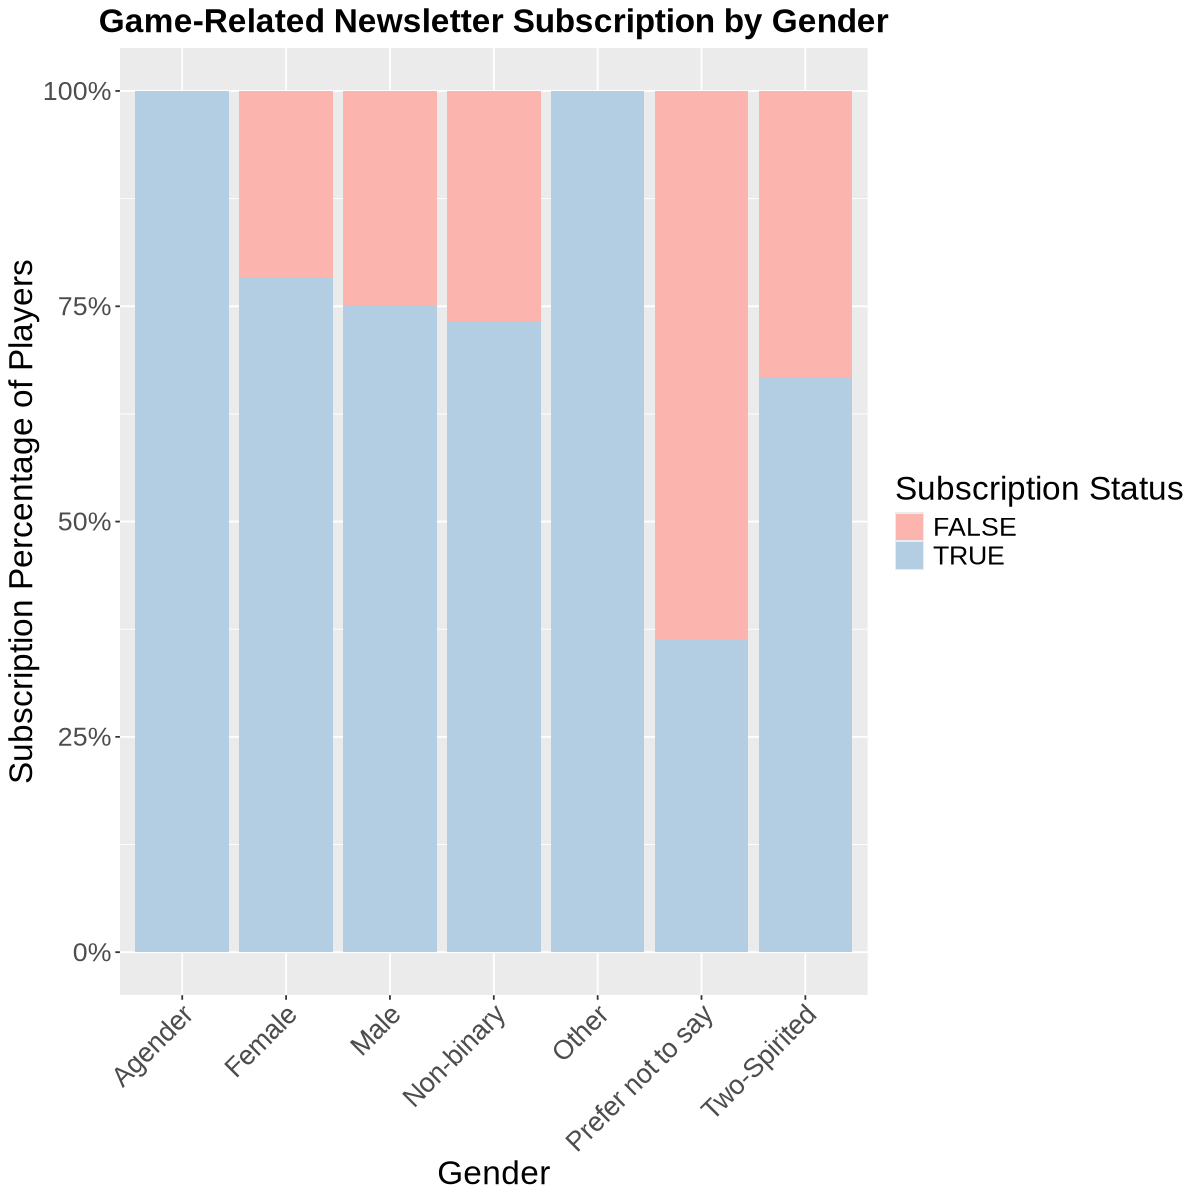

In [116]:
options(repr.plot.width=10, repr.plot.height=10)

subscription_gender_plot <- players |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = scales::percent) +
    xlab("Gender") +
    ylab("Subscription Percentage of Players") +
    labs(fill = "Subscription Status") +
    ggtitle("Game-Related Newsletter Subscription by Gender") +
    scale_fill_brewer(palette = 'Pastel1') + 
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle = 45,hjust = 1),
        plot.title = element_text(size = 20,face = 'bold',hjust = 0.5))


    
subscription_gender_plot

#### Data Insights:
Females and males have similar percentage levels of subscription status. However, in the category "prefer not to say" has the lowest percentage of subscription status.

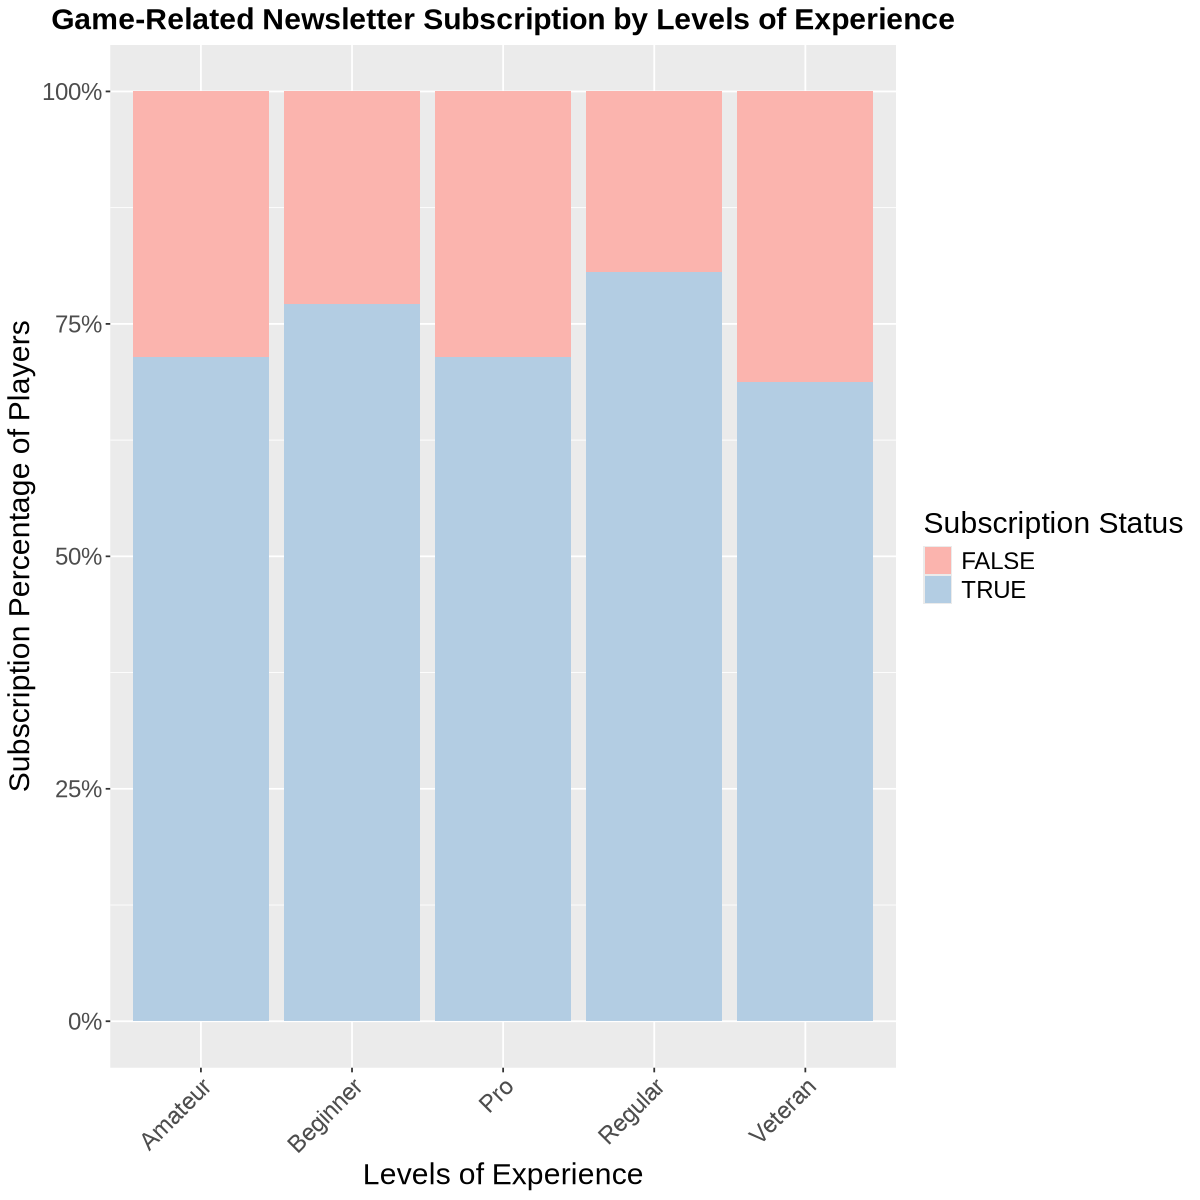

In [117]:
subscription_experience_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = scales::percent) +
    xlab("Levels of Experience") +
    ylab("Subscription Percentage of Players") +
    labs(fill = "Subscription Status") +
    ggtitle("Game-Related Newsletter Subscription by Levels of Experience") +
    scale_fill_brewer(palette = 'Pastel1') + 
    theme(text = element_text(size = 18),
        axis.text.x = element_text(angle = 45,hjust = 1),
        plot.title = element_text(size = 18,face ='bold',hjust = 0.5))
subscription_experience_plot

#### Data Insights:
Levels of experience doesn't seem to affect the subscription status of players as the percentage range is very similar for each category. 

## Methods

To answer the above research questions, to predict if gender and level of player's experience can determine whether or not a player subscribes to a game related newsletter, K-nearest neighbor classification will be used. 

experience,subscribe,gender
<chr>,<fct>,<chr>
Pro,Yes,Male
Veteran,Yes,Male
Veteran,No,Male
Amateur,Yes,Female
Regular,Yes,Male
Amateur,Yes,Female
Regular,Yes,Female
Amateur,No,Male
Amateur,Yes,Male


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


→ A | warning: ! There are new levels in `gender`: "Agender".
               ℹ Consider using step_novel() (`?recipes::step_novel()`) \ before
                 `step_dummy()` to handle unseen values.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1
→ C | warning: ! There are new levels in `gender`: "Other".
               ℹ Consider using step_novel() (`?recipes::step_novel()`) \ before
                 `step_dummy()` to handle unseen values.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x2   C: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4025573,3,0.004850088,Preprocessor1_Model01
1,roc_auc,binary,0.5452381,3,0.020026909,Preprocessor1_Model01
2,accuracy,binary,0.3425926,3,0.047514828,Preprocessor1_Model02
2,roc_auc,binary,0.4208333,3,0.004648958,Preprocessor1_Model02
3,accuracy,binary,0.3298060,3,0.057825737,Preprocessor1_Model03
3,roc_auc,binary,0.3895833,3,0.044381178,Preprocessor1_Model03
4,accuracy,binary,0.3298060,3,0.057825737,Preprocessor1_Model04
4,roc_auc,binary,0.3568452,3,0.028517123,Preprocessor1_Model04
5,accuracy,binary,0.3179012,3,0.063328039,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4025573,3,0.004850088,Preprocessor1_Model01
2,accuracy,binary,0.3425926,3,0.047514828,Preprocessor1_Model02
3,accuracy,binary,0.3298060,3,0.057825737,Preprocessor1_Model03
4,accuracy,binary,0.3298060,3,0.057825737,Preprocessor1_Model04
5,accuracy,binary,0.3179012,3,0.063328039,Preprocessor1_Model05
6,accuracy,binary,0.3302469,3,0.058641975,Preprocessor1_Model06
7,accuracy,binary,0.4021164,3,0.017008202,Preprocessor1_Model07
8,accuracy,binary,0.4378307,3,0.050096023,Preprocessor1_Model08
9,accuracy,binary,0.5097002,3,0.104503866,Preprocessor1_Model09


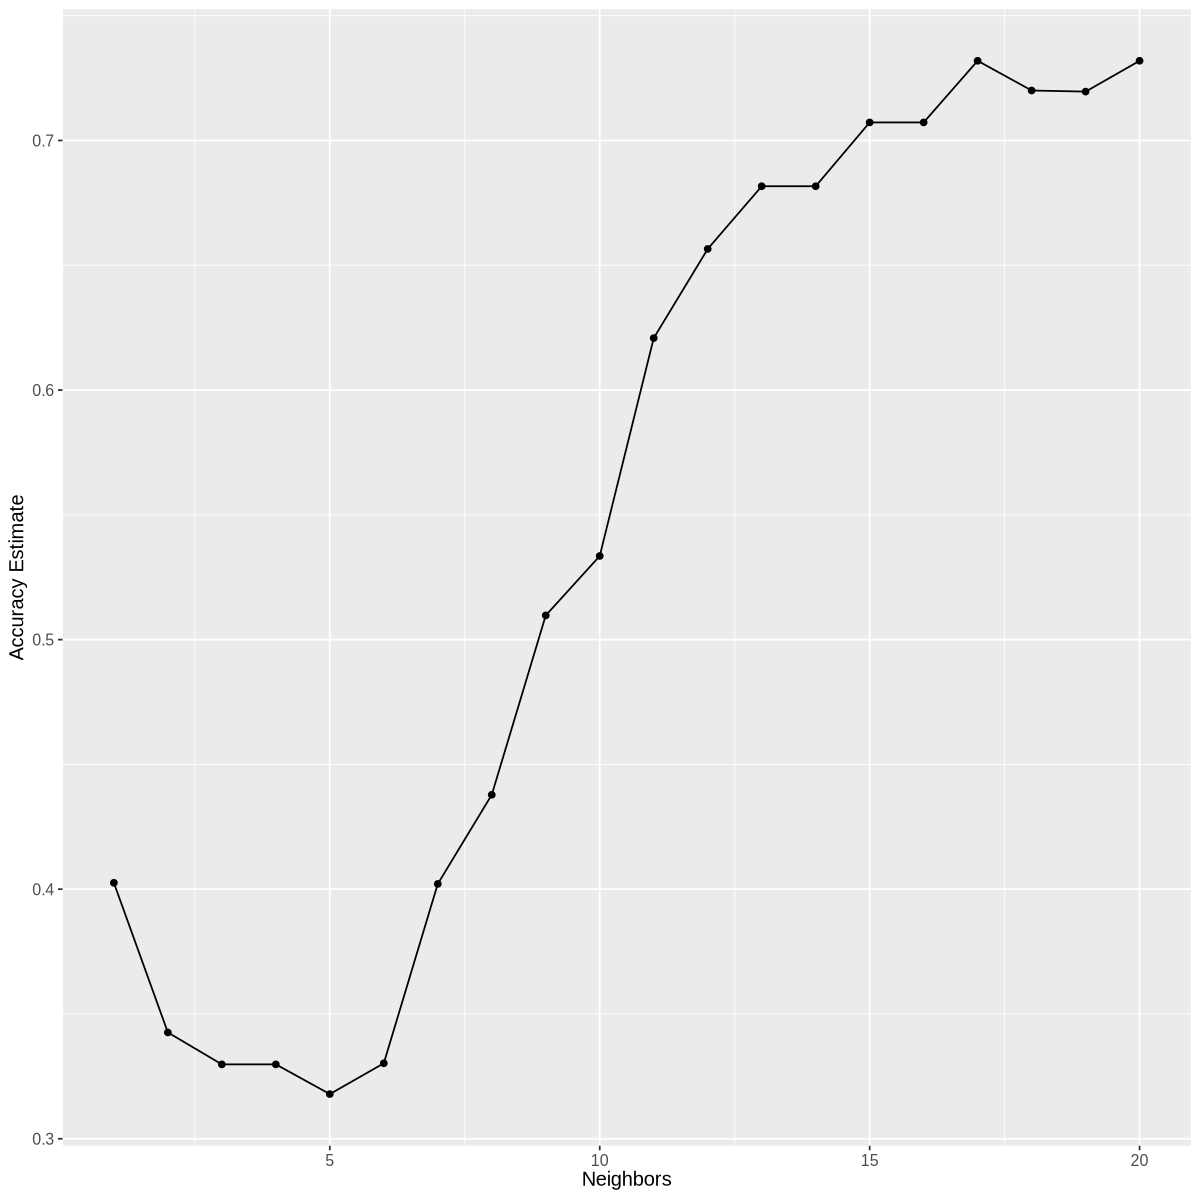

In [156]:
#knn classification

set.seed(123)

players <- players |>
  mutate(subscribe = factor(subscribe, levels = c(TRUE, FALSE), labels = c("Yes", "No")))
players

players_split <- initial_split(players, prop = 0.70, strata = subscribe)
players_train <- training(players_split) 
players_test <- testing(players_split)

players_vfold  <- vfold_cv(players_train, v = 5, strata = subscribe)

players_recipe <- recipe(subscribe ~ gender + experience, data = players_train) |>
  step_dummy(all_nominal_predictors()) |>
  step_normalize(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) 
    
players_fit

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))


players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

players_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()
players_results

accuracies<- filter(players_results, .metric == "accuracy")
accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k


#knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
   # set_enine("kknn") |>
   # set_mode("classification")

#k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1)


                     


In [151]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 17

In [162]:
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(new_knn_spec) |>
  fit(data = players_train)
knn_fit

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
players_test_predictions

confusion <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(17,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2426471
Best kernel: rectangular
Best k: 17

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.75


.pred_class,experience,subscribe,gender
<fct>,<chr>,<fct>,<chr>
Yes,Pro,Yes,Male
Yes,Veteran,Yes,Male
Yes,Veteran,No,Male
Yes,Amateur,Yes,Female
Yes,Amateur,No,Male
Yes,Pro,Yes,Male
Yes,Amateur,Yes,Female
Yes,Regular,Yes,Male
Yes,Beginner,Yes,Male


          Truth
Prediction Yes No
       Yes  44 15
       No    0  1

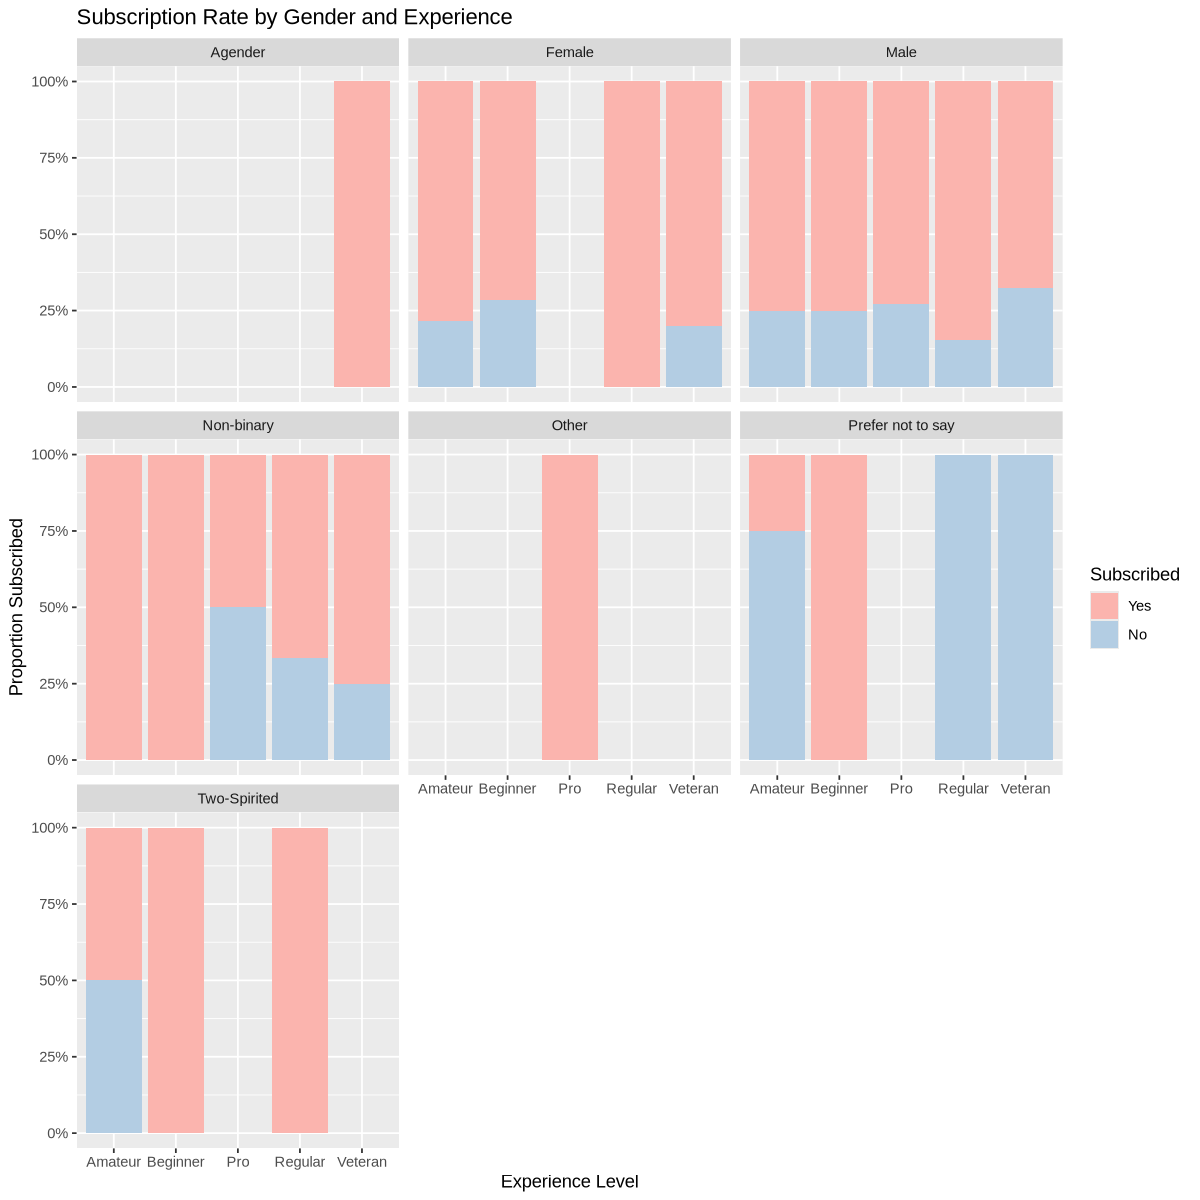

In [165]:
players |>
  count(gender, experience, subscribe) |>
  group_by(gender, experience) |>
  mutate(prop = n / sum(n)) |>
  ggplot(aes(x = experience, y = prop, fill = subscribe)) +
  geom_col(position = "fill") +
  facet_wrap(~ gender) +
  scale_y_continuous(labels = scales::percent) +
    scale_fill_brewer(palette = 'Pastel1') +
    labs(
    title = "Subscription Rate by Gender and Experience",
    y = "Proportion Subscribed",
    x = "Level of Player's Experience",
    fill = "Subscribed")
